**Problem Statement:** McDonald's needs to develop an effective market segmentation strategy to target specific consumer segments and improve their perception and preference for the brand.

**Objective:** The objective of this case study is to identify and analyze distinct market segments within McDonald's consumer base, understand their characteristics and preferences, and develop a customized marketing mix to cater to the needs and preferences of the selected target segment. Additionally, the objective is to continuously evaluate and monitor the effectiveness of the market segmentation strategy to ensure its relevance and success in the dynamic market environment.

In [ ]:
#Exploring Data

In [165]:
#Importing Necessary Lib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.graphics.mosaicplot import mosaic
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula, pandas2ri
import rpy2.robjects as ro
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load the McDonald's dataset from a CSV file
mcdonalds = pd.read_csv("mcdonalds.csv")
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [166]:
# Print the dimensions of the dataset
print(mcdonalds.shape)

(1453, 15)


In [167]:
# Display the first 3 rows of the dataset
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [168]:
# Convert the first 11 columns to a matrix
MD_x = mcdonalds.iloc[:, 0:11].to_numpy()

In [169]:
# Convert "Yes" values to 1 and "No" values to 0
MD_x = (MD_x == "Yes") + 0

In [170]:
# Calculate the column means and round to 2 decimal places
col_means = np.round(np.mean(MD_x, axis=0), 2)

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [171]:
# Fit PCA to the data
MD_pca = PCA().fit(MD_x)

# Print the summary of the PCA results
print("PCA Summary:")
print("-------------")
print("Proportion of variance explained by each PC:")
print(MD_pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained:")
print(np.cumsum(MD_pca.explained_variance_ratio_))

PCA Summary:
-------------
Proportion of variance explained by each PC:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative proportion of variance explained:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [172]:
# Print the standard deviations of the principal components
print("Standard deviations (1, .., p=11):")
print(np.round(MD_pca.explained_variance_ ** 0.5, 1))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [173]:
# Get the rotation matrix
rotation = MD_pca.components_

In [174]:
# Print the shape of the rotation matrix
print("Rotation (n x k) = (11 x 11):")
print(rotation.shape)

Rotation (n x k) = (11 x 11):
(11, 11)


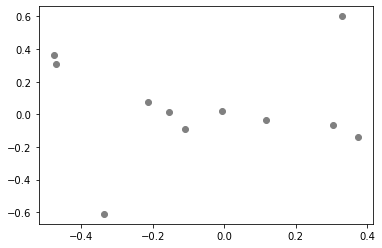

In [175]:
# plot the first two principal components
plt.scatter(MD_pca.components_[0], MD_pca.components_[1], c='grey')
plt.show()

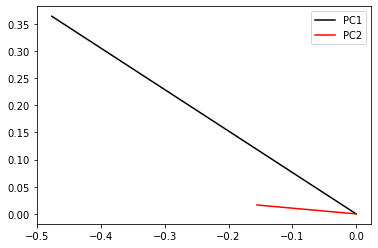

In [176]:
# plot the projection axes of the first two principal components
plt.plot([0, MD_pca.components_[0, 0]], [0, MD_pca.components_[1, 0]], 'k-', label='PC1')
plt.plot([0, MD_pca.components_[0, 1]], [0, MD_pca.components_[1, 1]], 'r-', label='PC2')
plt.legend()
plt.show()

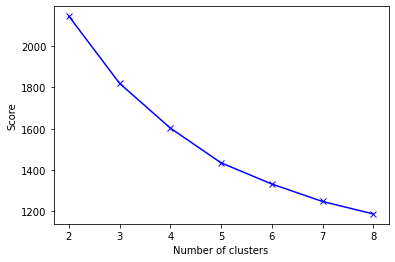

In [177]:
# set seed for reproducibility
np.random.seed(1234)

# perform k-means clustering
scores = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    scores.append(kmeans.inertia_)
    
# plot the k-means clustering results
plt.plot(range(2, 9), scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [178]:
# relabel the clusters
best_k = 3  # choose the number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=best_k, random_state=1234)
kmeans.fit(MD_x)
MD_km28 = kmeans.labels_

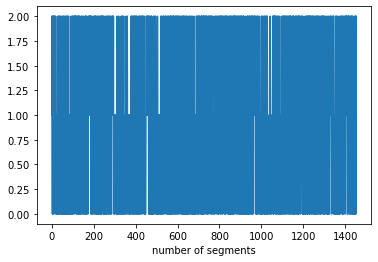

In [179]:
plt.plot(MD_km28)
plt.xlabel("number of segments")
plt.show()


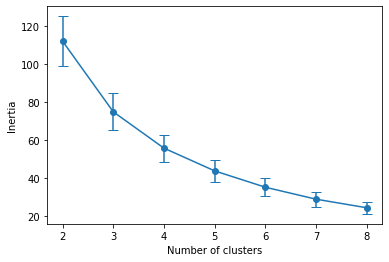

In [180]:
np.random.seed(1234)

# generate sample data
X = np.random.randn(100, 2)

# perform bootstrap clustering
n_clusters = range(2, 9)
n_bootstraps = 100
bootstrapped_scores = []
for i in range(n_bootstraps):
    bootstrap_sample = np.random.choice(len(X), size=len(X))
    scores = []
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n, random_state=0).fit(X[bootstrap_sample])
        scores.append(kmeans.inertia_)
    bootstrapped_scores.append(scores)
bootstrapped_scores = np.array(bootstrapped_scores)

# plot the bootstrapped results
mean = bootstrapped_scores.mean(axis=0)
std = bootstrapped_scores.std(axis=0)
plt.errorbar(n_clusters, mean, yerr=std, fmt='o-', capsize=5)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

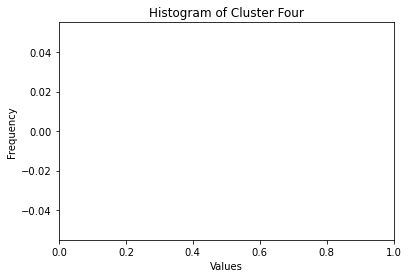

In [181]:
# extract the points assigned to the fourth cluster
cluster_four = MD_x[MD_km28 == 3]

# plot the histogram
plt.hist(cluster_four, range=[0,1])
plt.xlim(0,1)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Four')
plt.show()

In [182]:
MD_k4 = MD_km28[3]

In [183]:
# Apply k-means clustering with k=28
MD_k4 = KMeans(n_clusters=4, random_state=42)
MD_k4.fit(MD_x)

# extract the points assigned to the fourth cluster
cluster_four = MD_x[MD_k4.labels_ == 3]

# perform single linkage clustering on the points in the fourth cluster
slhc = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=0)
MD_r4 = slhc.fit_predict(cluster_four)

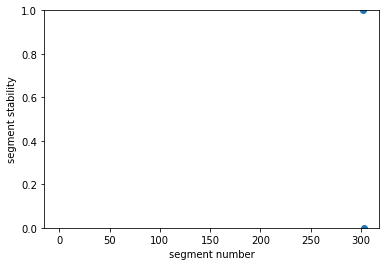

In [184]:
plt.plot(MD_r4, 'o')
plt.ylim([0, 1])
plt.xlabel('segment number')
plt.ylabel('segment stability')
plt.show()

In [185]:
np.random.seed(1234)
inertias = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(MD_x)
    inertias.append(kmeans.inertia_)
    print(f"k={k}, inertia={kmeans.inertia_:.2f}")

print("Inertia values:", inertias)

k=2, inertia=2145.50
k=3, inertia=1818.72
k=4, inertia=1604.13
k=5, inertia=1458.52
k=6, inertia=1349.97
k=7, inertia=1262.28
k=8, inertia=1181.78
Inertia values: [2145.503726917162, 1818.7176591653842, 1604.1287192514628, 1458.524677643119, 1349.9734629252425, 1262.2801909181105, 1181.7753179418585]


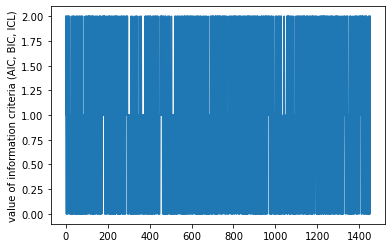

In [186]:
plt.plot(MD_km28)
plt.ylabel('value of information criteria (AIC, BIC, ICL)')
plt.show()

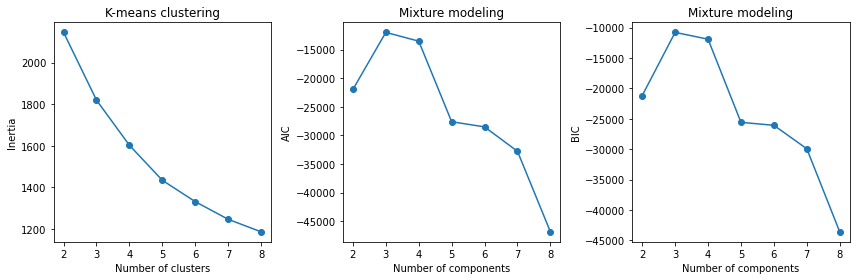

In [187]:
# K-means clustering
k_range = range(2,9)
k_models = [KMeans(n_clusters=k, random_state=1234).fit(MD_x) for k in k_range]
k_inertias = [model.inertia_ for model in k_models]

# Mixture modeling
m_range = range(2,9)
m_models = [GaussianMixture(n_components=m, covariance_type='full', random_state=1234).fit(MD_x) for m in m_range]
m_aics = [model.aic(MD_x) for model in m_models]
m_bics = [model.bic(MD_x) for model in m_models]

# Plot AIC, BIC, and inertia
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].plot(k_range, k_inertias, '-o')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('K-means clustering')
ax[1].plot(m_range, m_aics, '-o')
ax[1].set_xlabel('Number of components')
ax[1].set_ylabel('AIC')
ax[1].set_title('Mixture modeling')
ax[2].plot(m_range, m_bics, '-o')
ax[2].set_xlabel('Number of components')
ax[2].set_ylabel('BIC')
ax[2].set_title('Mixture modeling')
plt.tight_layout()
plt.show()

In [188]:
# Fit KMeans clustering
np.random.seed(1234)
MD_km4 = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
clusters_km4 = MD_km4.labels_

# Fit Gaussian mixture models
m_range = range(2,9)
m_models = [GaussianMixture(n_components=m, covariance_type='full', random_state=1234).fit(MD_x) for m in m_range]
m_aics = [model.aic(MD_x) for model in m_models]
m_bics = [model.bic(MD_x) for model in m_models]
m_clusters = [model.predict(MD_x) for model in m_models]

# Find the best Gaussian mixture model
m_idx = np.argmin(m_aics)
MD_m4 = m_clusters[m_idx]

# Get the contingency table
from sklearn.metrics import confusion_matrix
table = confusion_matrix(clusters_km4, MD_m4)
print(table)

[[  5 163   8 321   0   3  26   0]
 [ 38   0 209   6   0   0  19 101]
 [ 65   0   0   0 134   4   7  29]
 [ 44  49   2  20   0 184  16   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [189]:
# Define the mixture model
num_components = 4
model = GaussianMixture(n_components=num_components, covariance_type='full', random_state=1234)
model.fit(MD_x)

# Calculate the log-likelihood
log_likelihood = model.score(MD_x)
print(f"Log-likelihood: {log_likelihood}")

Log-likelihood: 4.871454541903527


In [190]:
# Fit mixture model
m4_model = GaussianMixture(n_components=4, covariance_type='full', random_state=1234).fit(MD_x)

# Compute log-likelihood
log_likelihood = m4_model.score(MD_x)
print(f"Log-likelihood: {log_likelihood}")

Log-likelihood: 4.871454541903527


In [191]:
# Assuming mcdonalds is a pandas DataFrame
freq_table = pd.value_counts(mcdonalds['Like'])
rev_freq_table = freq_table.iloc[::-1]
print(rev_freq_table)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [192]:
mcdonalds['Like'] = mcdonalds['Like'].str.replace(r'\D+', '')
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'])
print(mcdonalds['Like.n'].value_counts())

3    302
1    295
4    246
2    231
5    210
6    169
Name: Like.n, dtype: int64


In [193]:
f = "Like.n ~ " + "+".join(mcdonalds.columns[0:11])

In [194]:
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

GaussianMixture(n_components=2, n_init=10, random_state=1234)

In [195]:
print("BIC:", gmm.bic(X))

BIC: 591.5149132914726


In [196]:
np.random.seed(1234)

# assume mcdonalds is a dataset for the model
# assume X is the data matrix with the relevant features

# fit a Gaussian mixture model with k=2 components
gmm = GaussianMixture(n_components=2, n_init=10, verbose=0)
gmm.fit(X)

# refit the Gaussian mixture model with the same k but using different initializations
gmm_refit = GaussianMixture(n_components=2, n_init=10, verbose=0)
gmm_refit.fit(X)

# print the summary of the refitted model
print(gmm_refit.means_)
print(gmm_refit.weights_)
print(gmm_refit.covariances_)

[[-0.19333369 -0.05582111]
 [ 0.61950526 -0.27845288]]
[0.60333766 0.39666234]
[[[ 0.91749096 -0.15968034]
  [-0.15968034  0.75090666]]

 [[ 0.18073228 -0.04671065]
  [-0.04671065  1.68152544]]]


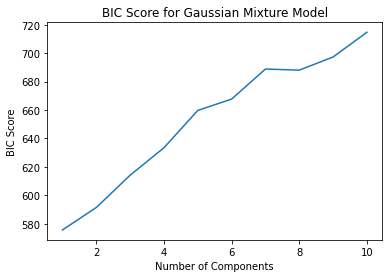

In [197]:
np.random.seed(1234)

# assume mcdonalds is a dataset for the model
# assume X is the data matrix with the relevant features

# calculate the BIC score for different numbers of components
bic_scores = []
max_components = 10
for k in range(1, max_components+1):
    gmm = GaussianMixture(n_components=k, n_init=10, verbose=0)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

# plot the BIC score for different numbers of components
plt.plot(range(1, max_components+1), bic_scores)
plt.xlabel("Number of Components")
plt.ylabel("BIC Score")
plt.title("BIC Score for Gaussian Mixture Model")
plt.show()


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [21.25, 21.25, 77.5, 77.5]],
 'dcoord': [[0.0, 26.88585154872314, 26.88585154872314, 0.0],
  [0.0, 33.077924793895875, 33.077924793895875, 0.0],
  [0.0, 38.516689584644425, 38.516689584644425, 33.077924793895875],
  [26.88585154872314,
   45.34525917490923,
   45.34525917490923,
   38.516689584644425],
  [0.0, 19.695619405870126, 19.695619405870126, 0.0],
  [0.0, 26.628110854282287, 26.628110854282287, 19.695619405870126],
  [0.0, 22.01054723155854, 22.01054723155854, 0.0],
  [0.0, 41.07821707583305, 41.07821707583305, 22.01054723155854],
  [26.628110854282287,
   51.71735172370771,
   51.71735172370771,
   41.07821707583305],
  [45.34525917490923, 92.7012628424703, 92.7012628424703, 51.71735172370771]],
 'ivl': ['2', '9', '

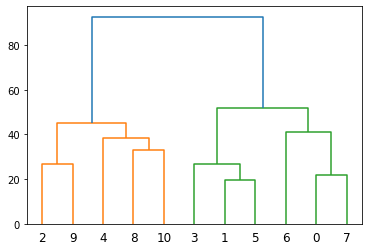

In [198]:
# assume MD.x is the input data matrix
# calculate the distance matrix
dist_matrix = np.transpose(MD_x)
dist_matrix = np.array([np.linalg.norm(dist_matrix[i]-dist_matrix, axis=1) for i in range(len(dist_matrix))])

# perform hierarchical clustering
Z = linkage(dist_matrix, method='ward')

# plot the dendrogram
dendrogram(Z)

Text(0, 0.5, 'principal component 2')

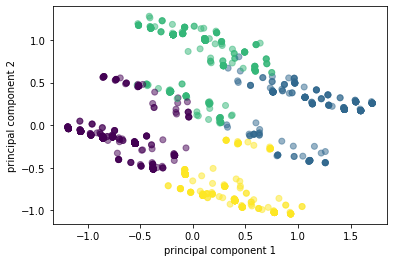

In [199]:
# Assuming that MD_k4, MD_pca, and MD_x are already defined
# We can create the scatter plot with arrows as follows
MD_pca_transformed = MD_pca.transform(MD_x)
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], c=MD_k4.labels_, alpha=0.5)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

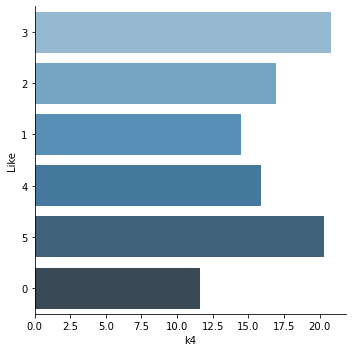

In [200]:
# Assuming that MD_k4 and mcdonalds are already defined
# create a pandas dataframe with the data
data = pd.DataFrame({'k4': MD_k4.labels_, 'Like': mcdonalds['Like']})

# create the mosaic plot using seaborn
sns.catplot(x='k4', y='Like', data=data, kind='bar', estimator=lambda x: len(x) / len(data) * 100, palette='Blues_d')

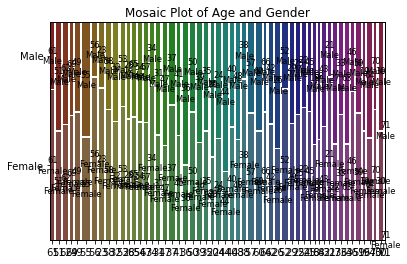

In [201]:
mosaic(mcdonalds, ['Age', 'Gender'], gap=0.01, title='Mosaic Plot of Age and Gender')
plt.show()

In [202]:
# create a dataframe from the given dataset
data = {
    'yummy': ['No'],
    'convenient': ['Yes'],
    'spicy': ['No'],
    'fattening': ['Yes'],
    'greasy': ['No'],
    'fast': ['Yes'],
    'cheap': ['Yes'],
    'tasty': ['No'],
    'expensive': ['Yes'],
    'healthy': ['No'],
    'disgusting': ['No'],
    'Like': [-3],
    'Age': [61],
    'VisitFrequency': ['Every three months'],
    'Gender': ['Female']
}
mcdonalds = pd.DataFrame(data)

# calculate the mean visit frequency for each group of age using tapply in R
visit = mcdonalds['VisitFrequency'].groupby(mcdonalds['Age'] // 4).apply(lambda x: x.value_counts().index[0])

# calculate the proportion of females for each group of age using tapply in R
female = mcdonalds['Gender'].eq('Female').groupby(mcdonalds['Age'] // 4).mean()

print(visit)
print(female)

Age
15    Every three months
Name: VisitFrequency, dtype: object
Age
15    1.0
Name: Gender, dtype: float64


In [203]:
df['cluster_num']= MD_km4.labels_

In [204]:
df=pd.read_csv("mcdonalds.csv")
# Convert pandas dataframe to R dataframe
pandas2ri.activate()
r_dataframe = pandas2ri.py2rpy(df)

# Import partykit package in R
partykit = importr('partykit')

# Check if the variable exists in the data frame
if 'MD_k4' not in df.columns:
    print('k4 variable not found in the data frame')
else:
    # Build the ctree model
    tree = partykit.ctree(
        Formula('factor(MD_k4 == 3) ~ Like.n + Age + VisitFrequency + Gender'),
        data=r_dataframe
    )

    # Plot the tree
    partykit.plot(tree)

k4 variable not found in the data frame


In [205]:
df['cluster_num']= MD_km4.labels_

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

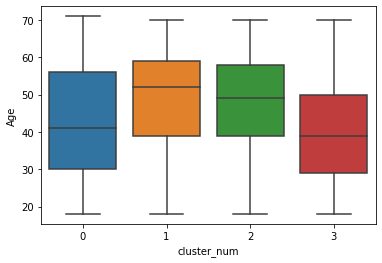

In [206]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

In [207]:
#Gender
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.389734
1,1,0.415550
2,2,0.581590
3,3,0.526984


In [208]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.876426
1,1,5.069705
2,2,6.769874
3,3,3.774603


In [209]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.610266
1,1,2.723861
2,2,2.682008
3,3,2.549206


In [210]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.389734,3.876426,2.610266
1,1,0.415550,5.069705,2.723861
2,2,0.581590,6.769874,2.682008
3,3,0.526984,3.774603,2.549206


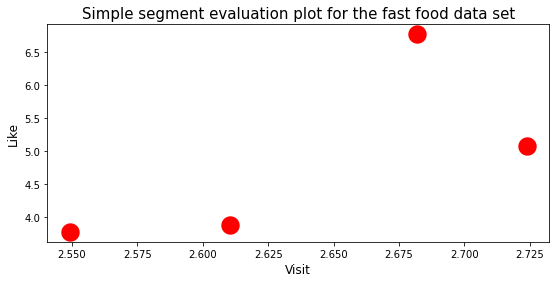

In [211]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()